# LDA Analysis
LDA analysis on the IRT ratios data to understand how the different classes are mixed

In [1]:
import json
import os
import numpy as np

### Data loading

In [2]:
features = []
features_label = []

path_save = "../json/features_labelise/"
dirs = os.listdir(path_save)

for f in dirs:
    #print ("computing data in : " + path_save + f)
    with open(path_save + f, 'r') as file:
        feature = json.load(file)
    temp = []
    temp.append(feature["Ratio_band1_0_band2_1_scale_1"])
    temp.append(feature["Ratio_band1_0_band2_1_scale_2"])
    temp.append(feature["Ratio_band1_0_band2_2_scale_4"])
    temp.append(feature["Ratio_band1_0_band2_1_scale_4"])
    temp.append(feature["Ratio_band1_0_band2_2_scale_2"])
    temp.append(feature["Ratio_band1_0_band2_2_scale_1"])
    temp.append(feature["Ratio_band1_1_band2_3_scale_2"])
    temp.append(feature["Ratio_band1_1_band2_3_scale_1"])
    temp.append(feature["Ratio_band1_1_band2_3_scale_4"])
    temp.append(feature["Ratio_band1_0_band2_3_scale_4"])
    temp.append(feature["Ratio_band1_0_band2_3_scale_2"])
    temp.append(feature["Ratio_band1_2_band2_3_scale_4"])
    temp.append(feature["Ratio_band1_0_band2_3_scale_1"])
    temp.append(feature["Ratio_band1_1_band2_2_scale_4"])
    temp.append(feature["Ratio_band1_1_band2_2_scale_2"])
    temp.append(feature["Ratio_band1_1_band2_2_scale_1"])
    temp.append(feature["Ratio_band1_2_band2_3_scale_1"])
    temp.append(feature["Ratio_band1_2_band2_3_scale_2"])
    features.append(temp)
    features_label.append(feature["Label"])
    file.close()
    



In [3]:
features = np.array(features)
features_label = np.array(features_label)
print(features.shape)
print(features_label.shape)

(150510, 18)
(150510,)


# LDA
Linear discriminant analysis

In [4]:
feats = features.astype(np.float)    #features
labels = features_label    #labels

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
projected = lda.fit(feats, labels).transform(feats)
print(feats.shape)
print(projected.shape)

(150510, 18)
(150510, 2)


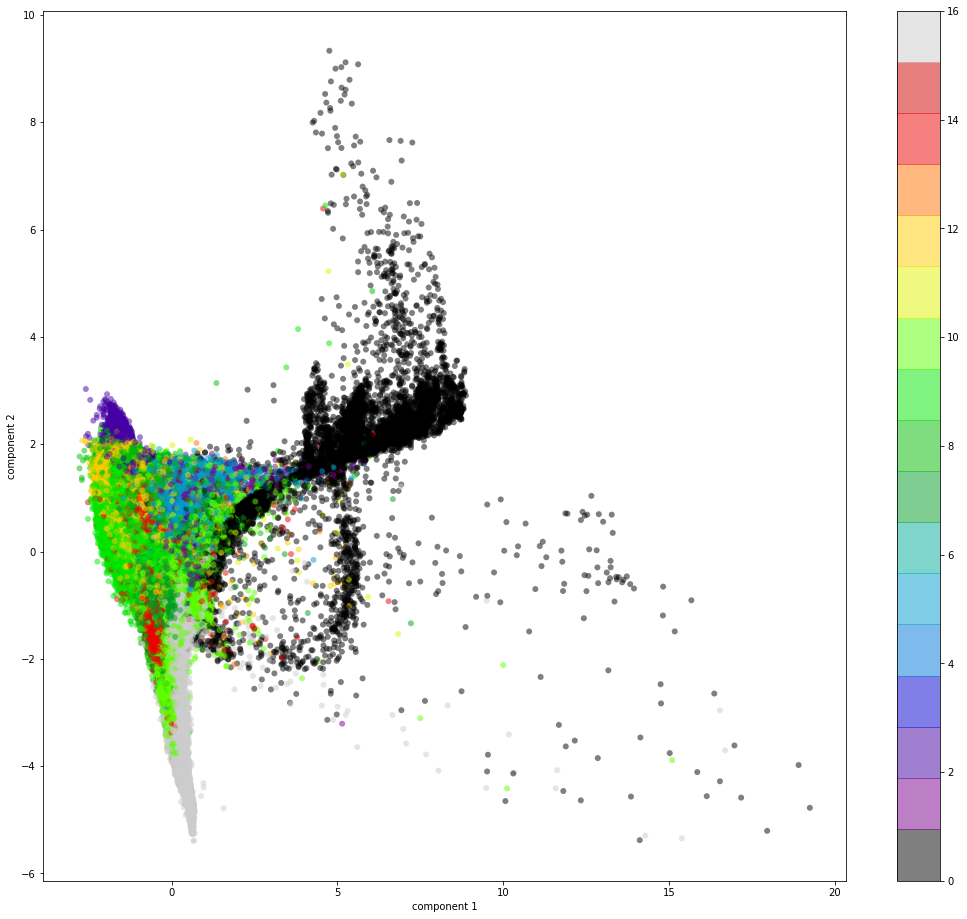

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 17))
plt.xlabel('component 1')
plt.ylabel('component 2')
#plt.xlim(5, 10)
#plt.ylim(6, 4)
plt.colorbar();
plt.show()

# 3D Plot
On ne garde que 4 classes pour pouvoir les comparer plus efficacement

In [7]:
condition = ((features_label == 12) | (features_label == 16) 
             | (features_label == 10) | (features_label == 7))
features_label_e = features_label[condition]
features_e = features[condition]

feats = features_e.astype(np.float)    #features
labels = features_label_e    #labels


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3)
projected = lda.fit(feats, labels).transform(feats)
print(feats.shape)
print(labels.shape)
print(projected.shape)

(77916, 18)
(77916,)
(77916, 3)


<IPython.core.display.Javascript object>


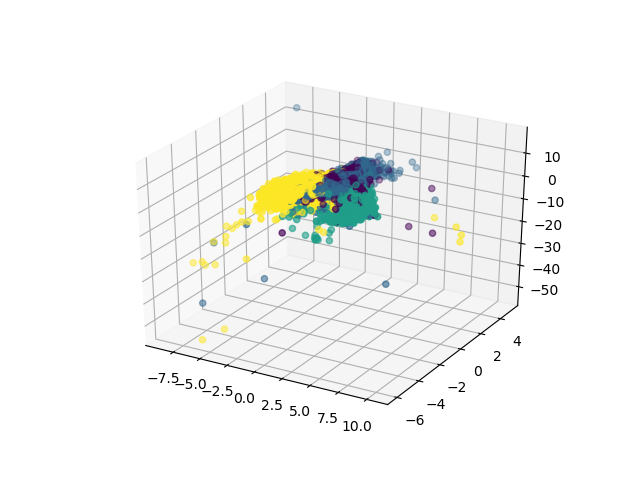

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2],
            c=labels)
plt.show()